In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import presentation_tools as pt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display
import pickle
from sklearn.manifold import TSNE

In [2]:
labeled_data = pd.read_pickle('../../data/labeled_data_pos_ont_nn.pkl')
drop_trash = (labeled_data['Aggr.Label'] < 90) & (labeled_data['NN_bool'] == False)
labeled_data = labeled_data[drop_trash]

In [3]:
pos_features = ['Adjective', 'Verb', 'Noun']
ont_features = ['Underspecified', 'Artifact', 'Object', 'Group', 'Human', 'Natural', 'LanguageRepresentation', 'Living', 'GeopoliticalPlace', 'BodyPart', 'Instrument', 'Place', '3rdOrderEntity', 'Mental', 'Purpose', 'Social', 'Institution', 'Plant', 'Imagerepresentation', 'Creature', 'Animal', 'Comestible', 'Quantity', 'Building', 'Substance', 'Part', 'Property', 'BoundedEvent', 'Agentive', 'Communication', 'Garment', 'Furniture', 'Vehicle', '1stOrderEntity', 'Covering', 'Liquid', 'Time', 'UnboundedEvent', 'Physical', 'Dynamic', 'Domain', 'Existence', 'Location', 'Manner', 'Container', 'Condition', 'Static', '2ndOrderEntity', 'Phenomenal', 'MoneyRepresentation', 'Experience', 'Relation', 'Form', 'Representation', 'Stimulating', 'Colour', 'Cause', 'Occupation', 'Possession', 'Artwork', 'Software']
numerical_features = ['Raw_len', 'Raw_word_count']
text_features = ['Lemma_stripped', 'Raw', 'Lemma']
features = pos_features + ont_features + numerical_features + text_features
target = 'Aggr.Label'

# Data characteristics

## Label distribution

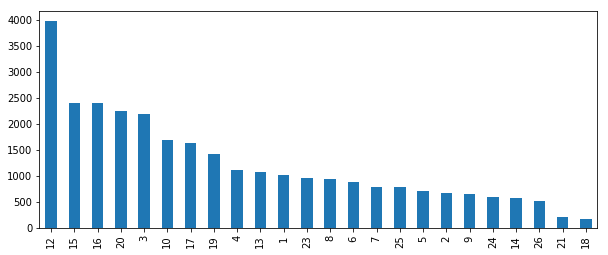

In [64]:
plt.figure(figsize=(10,4))
labeled_data[target].value_counts().plot(kind='bar');

## Mean document length (from raw document)

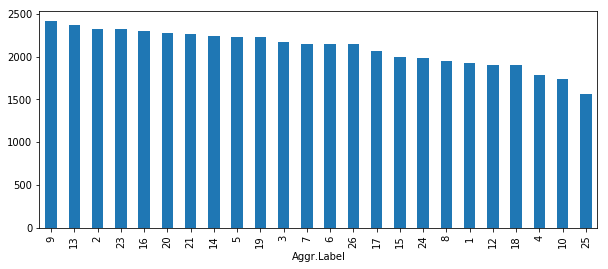

In [65]:
plt.figure(figsize=(10,4))
labeled_data.groupby(target)['Raw_len'].mean().sort_values(ascending=False).plot(kind='bar');

## Standard deviation of document length (from raw document)

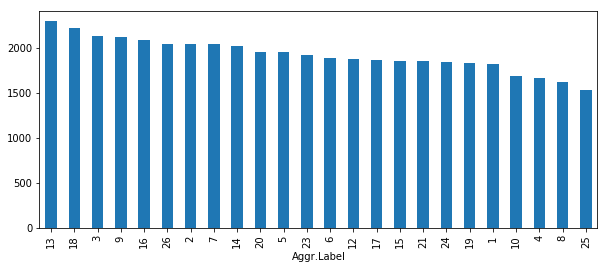

In [66]:
plt.figure(figsize=(10,4))
labeled_data.groupby(target)['Raw_len'].std().sort_values(ascending=False).plot(kind='bar');

## Mean word count (from raw document)

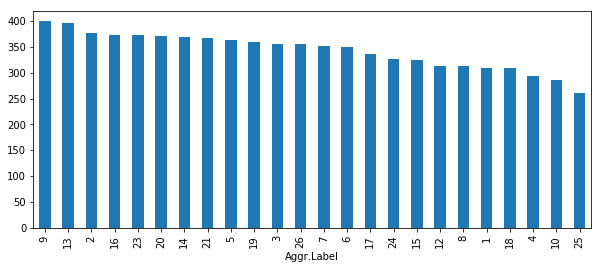

In [67]:
plt.figure(figsize=(10,4))
labeled_data.groupby(target)['Raw_word_count'].mean().sort_values(ascending=False).plot(kind='bar');

## POS tag distribution

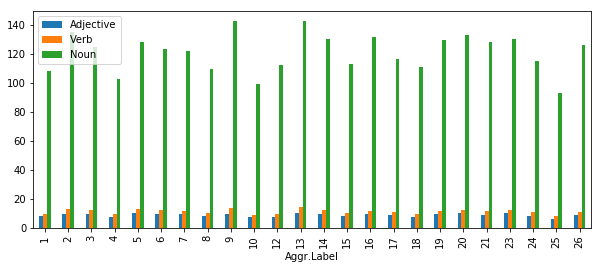

In [72]:
labeled_data.groupby(target)[pos_features].mean().plot.bar(figsize=(10,4));

## Frequent ONT tag distribution

<Figure size 720x288 with 0 Axes>

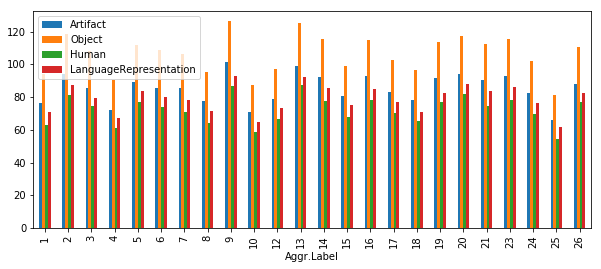

In [69]:
plt.figure(figsize=(10,4))
labeled_data[labeled_data[ont_features].columns[labeled_data[ont_features].mean(axis=0) > 20].tolist() + ['Aggr.Label']].groupby(target).mean().plot.bar(figsize=(10,4));

<Figure size 720x288 with 0 Axes>

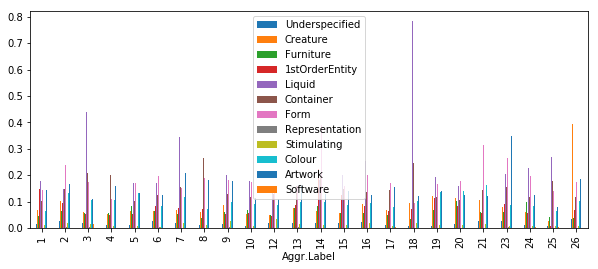

In [70]:
plt.figure(figsize=(10,4))
labeled_data[labeled_data[ont_features].columns[labeled_data[ont_features].mean(axis=0) < 0.25].tolist() + ['Aggr.Label']].groupby(target).mean().plot.bar(figsize=(10,4));

## FastText document distribution

C:\Users\nils\mystuff\utdanning\MASTER\semester03\DAT620\project\project\presentation\presentation_tools.py:31: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(colors)


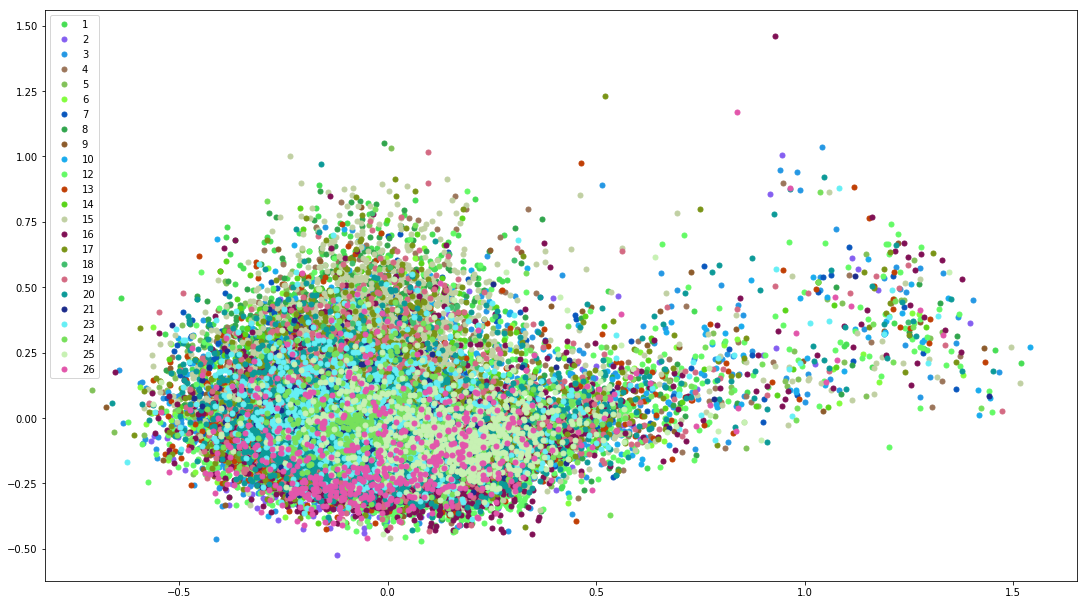

In [52]:
pca = PCA(n_components=2)
P = pca.fit_transform(pt.FT_to_matrix(labeled_data['Lemma_FT_mean'].values))
pt.plot_2d(P, labeled_data[target].values)

## FastText label mean distribution

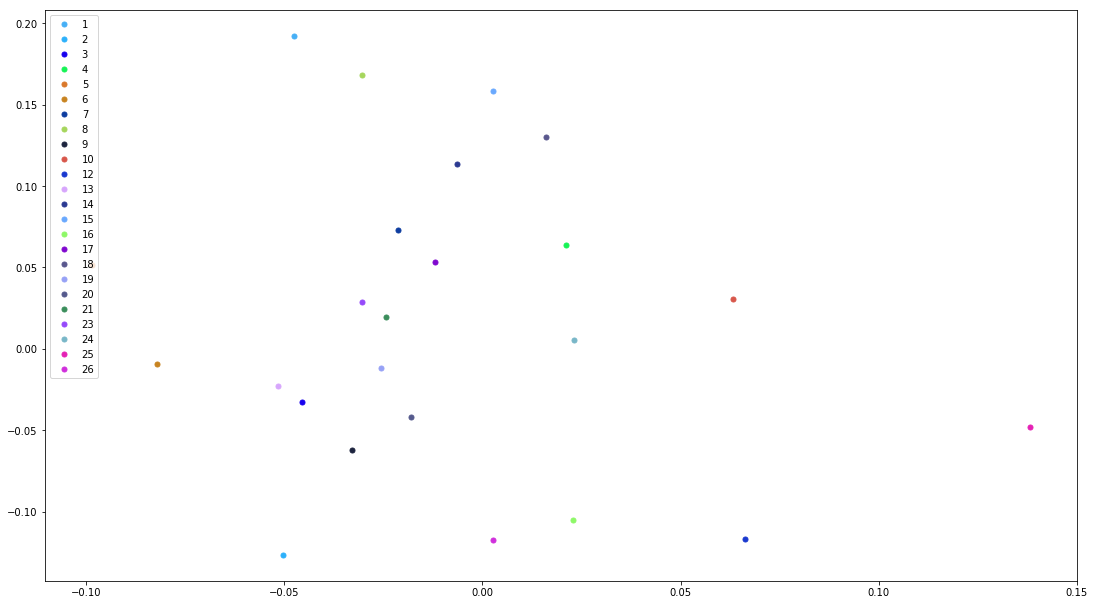

In [53]:
pt.plot_2d(P, labeled_data[target].values, 'mean')

## FastText label median distribution

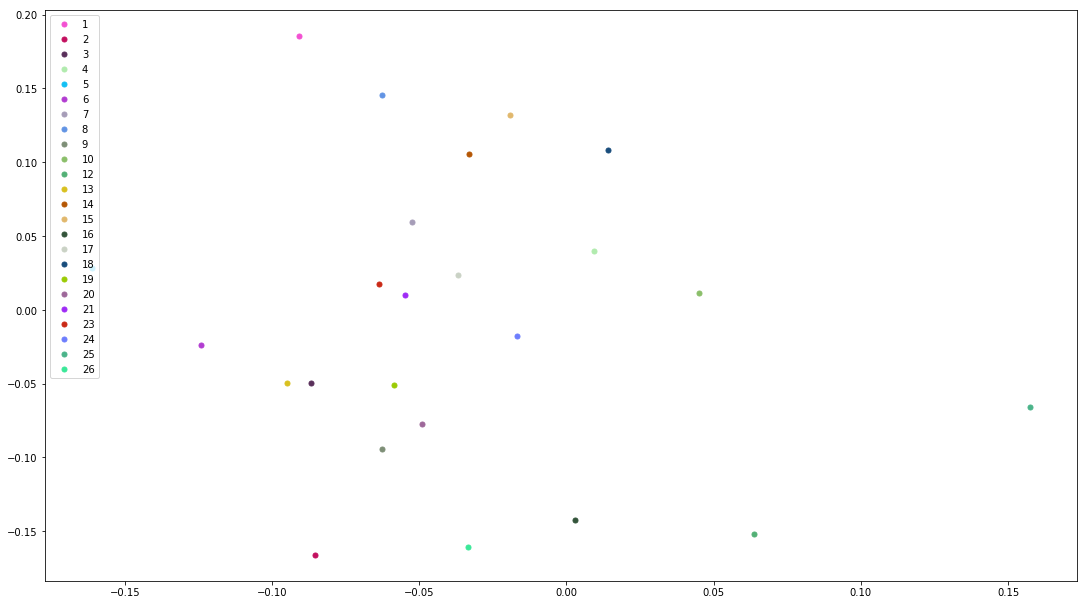

In [54]:
pt.plot_2d(P, labeled_data[target].values, 'median')

## FastText TSNE visualization

In [55]:
pca = PCA(n_components=50)
P = pca.fit_transform(pt.FT_to_matrix(labeled_data['Lemma_FT_mean'].values))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(P)
tsne_pca_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 29690 samples in 0.176s...
[t-SNE] Computed neighbors for 29690 samples in 115.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29690
[t-SNE] Computed conditional probabilities for sample 2000 / 29690
[t-SNE] Computed conditional probabilities for sample 3000 / 29690
[t-SNE] Computed conditional probabilities for sample 4000 / 29690
[t-SNE] Computed conditional probabilities for sample 5000 / 29690
[t-SNE] Computed conditional probabilities for sample 6000 / 29690
[t-SNE] Computed conditional probabilities for sample 7000 / 29690
[t-SNE] Computed conditional probabilities for sample 8000 / 29690
[t-SNE] Computed conditional probabilities for sample 9000 / 29690
[t-SNE] Computed conditional probabilities for sample 10000 / 29690
[t-SNE] Computed conditional probabilities for sample 11000 / 29690
[t-SNE] Computed conditional probabilities for sample 12000 / 29690
[t-SNE] Computed conditional probabilities for 

array([[ 2.2173786 ,  5.2325287 ],
       [-1.7069842 ,  0.20005564],
       [ 0.08862451,  3.9537306 ],
       ...,
       [ 2.76115   ,  2.7330415 ],
       [ 3.7149627 , -2.8681498 ],
       [-1.8908465 ,  0.81329286]], dtype=float32)

C:\Users\nils\mystuff\utdanning\MASTER\semester03\DAT620\project\project\presentation\presentation_tools.py:31: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(colors)


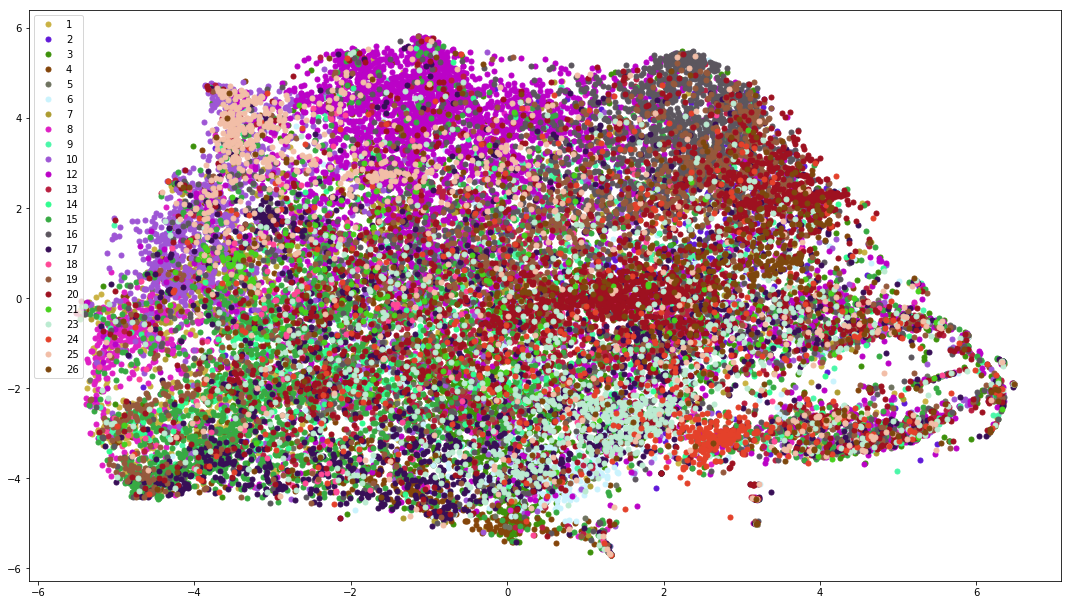

In [56]:
pt.plot_2d(tsne_pca_results, labeled_data[target].values)

## TFIDF document distribution

C:\Users\nils\mystuff\utdanning\MASTER\semester03\DAT620\project\project\presentation\presentation_tools.py:31: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle(colors)


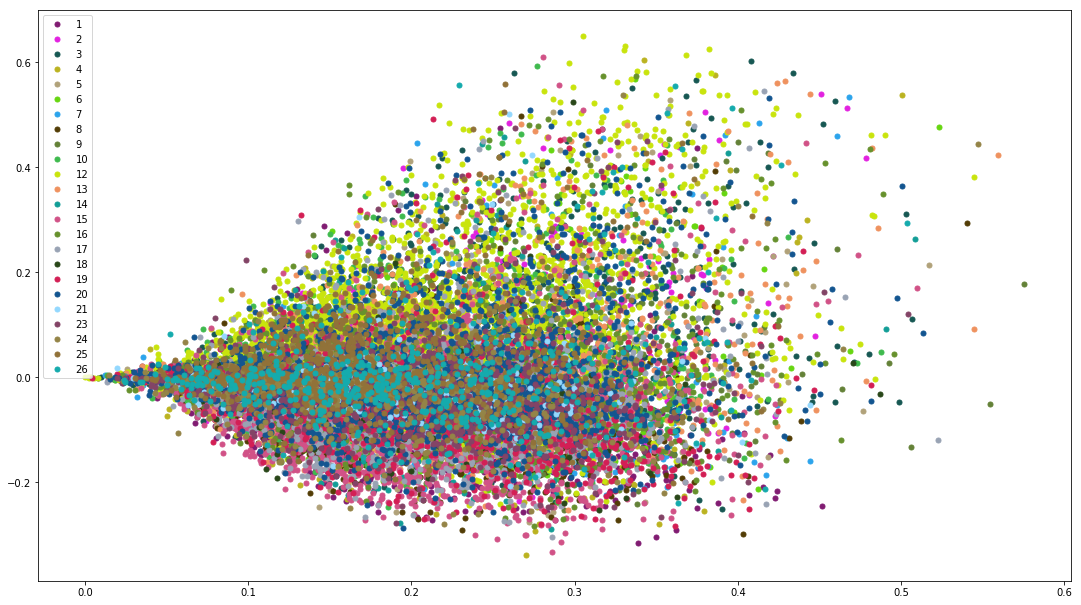

In [57]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)

vectorizer = TfidfVectorizer(**{'max_df': 0.3, 'max_features': None, 'norm': 'l2', 'strip_accents': 'unicode', 'use_idf': False})
X_reduced = svd.fit_transform(vectorizer.fit_transform(labeled_data['Lemma_stripped']))

pt.plot_2d(X_reduced, labeled_data[target].values)

## TFIDF label mean distribution

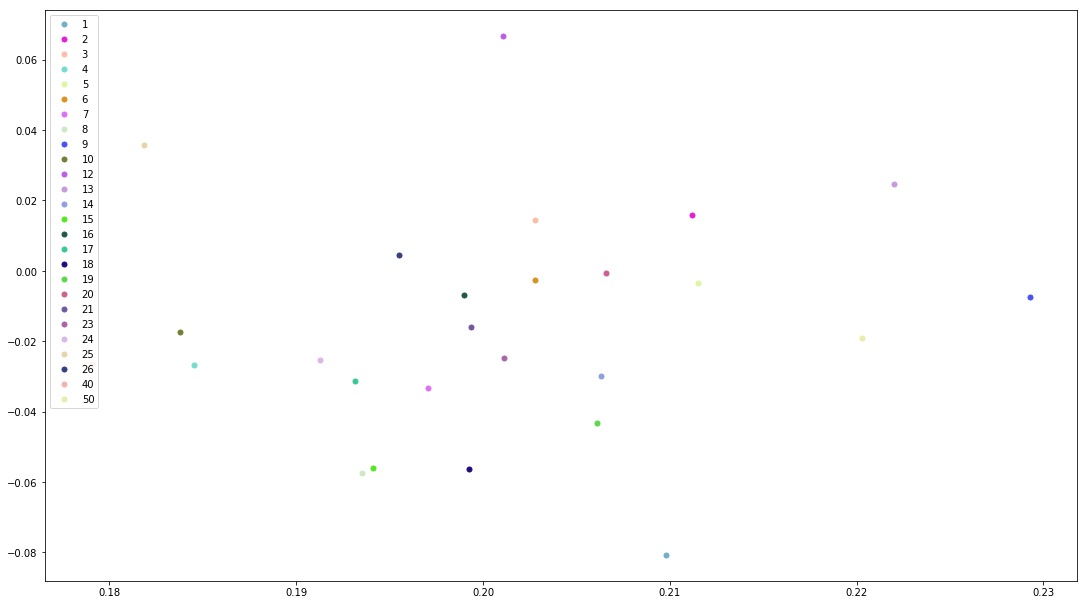

In [7]:
pt.plot_2d(X_reduced, labeled_data[target].values, 'mean')

## TFIDF label median distribution

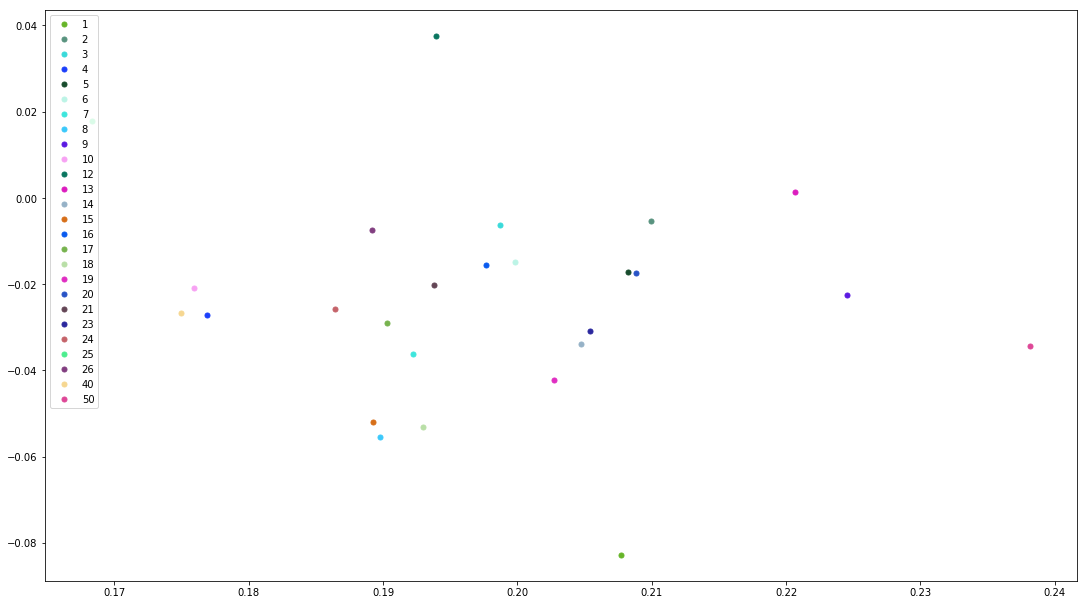

In [8]:
pt.plot_2d(X_reduced, labeled_data[target].values, 'median')

# Models

## First blood

In [22]:
loaded_results = pd.read_pickle('../../stats/157134796026_results_first_blood.pkl')
display(loaded_results.sort_values(by=['Precision','Accuracy'], ascending=False))

,Features,Vectorizer,V.params,Classifier,C.params,Accuracy,Precision,Recall,Fscore
All/TF-IDF/SGD,All,TF-IDF,{'max_df': 0.5},SGD,{'tol': 0.001},0.491226,0.491226,0.491226,0.491226
All/TF-IDF/Compl.NB,All,TF-IDF,{'max_df': 0.5},Compl.NB,{'alpha': 0.1},0.486168,0.486168,0.486168,0.486168
All/TF-IDF/SVM,All,TF-IDF,{'max_df': 0.5},SVM,{},0.483175,0.483175,0.483175,0.483175
All/TF-IDF/SVM_balanced,All,TF-IDF,{'max_df': 0.5},SVM_balanced,{'class_weight': 'balanced'},0.482969,0.482969,0.482969,0.482969
All/TF-IDF/PassvAggr,All,TF-IDF,{'max_df': 0.5},PassvAggr,"{'max_iter': 50, 'tol': 0.001}",0.444571,0.444571,0.444571,0.444571
All/TF-IDF/Perceptron,All,TF-IDF,{'max_df': 0.5},Perceptron,"{'max_iter': 50, 'tol': 0.001}",0.345995,0.345995,0.345995,0.345995
All/TF-IDF/Naive Bayes,All,TF-IDF,{'max_df': 0.5},Naive Bayes,{},0.190442,0.190442,0.190442,0.190442


## Vectorizers grid

In [4]:
loaded_results = pd.read_pickle('../../stats/1574733647_results_vectorizers.pkl')
display(loaded_results.sort_values(by=['Accuracy'], ascending=False).groupby('Vectorizer').head(1))

,Features,Vectorizer,V.params,Selector,Sel.params,Scaler,Sca.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
37_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/No_selector/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",No_selector,{},No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486891,0.511157,0.403926,0.429797
249_TextOnly/CountVectorizer/MultinomialNB/No_sampling/No_selector/No_scaling,TextOnly,CountVectorizer,"{'max_df': 0.3, 'max_features': None, 'strip_a...",No_selector,{},No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.478185,0.472123,0.409652,0.426955
304_TextOnly/HashingVectorizer/MultinomialNB/No_sampling/No_selector/No_scaling,TextOnly,HashingVectorizer,"{'alternate_sign': False, 'n_features': 131072...",No_selector,{},No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.464052,0.508664,0.358681,0.392953


## Selectors grid

In [11]:
loaded_results = pd.read_pickle('../../stats/1574797745_results_selectors.pkl')
display(loaded_results.sort_values(by=['Accuracy'], ascending=False).groupby('Selector').head(20))

,Features,Vectorizer,V.params,Selector,Sel.params,Scaler,Sca.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
5_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 35000, 'score_func': <function f_classif...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.488734,0.529217,0.401168,0.433624
7_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 40000, 'score_func': <function f_classif...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.488017,0.529212,0.403423,0.435669
8_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 50000, 'score_func': <function chi2 at 0...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486583,0.520989,0.402337,0.431969
3_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 30000, 'score_func': <function f_classif...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486481,0.529249,0.401102,0.434371
2_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 30000, 'score_func': <function chi2 at 0...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486379,0.516131,0.400275,0.430212
9_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 50000, 'score_func': <function f_classif...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486379,0.518836,0.398533,0.429363
6_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 40000, 'score_func': <function chi2 at 0...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.486071,0.518817,0.401994,0.431912
4_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 35000, 'score_func': <function chi2 at 0...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.485866,0.517316,0.400183,0.429826
1_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 25000, 'score_func': <function f_classif...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.485662,0.526218,0.399603,0.433056
0_TextOnly/TfidfVectorizer/MultinomialNB/No_sampling/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,"{'k': 25000, 'score_func': <function chi2 at 0...",No_scaling,{},MultinomialNB,{'alpha': 0.0015},No_sampling,{},0.484740,0.518789,0.399877,0.430828


## Samplers grid

In [6]:
loaded_results = pd.read_pickle('../../stats/1574801472_results_samplers.pkl')
display(loaded_results.sort_values(by=['Accuracy'], ascending=False).groupby('Sampler').head(1))

,Features,Vectorizer,V.params,Selector,Sel.params,Scaler,Sca.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
13_TextOnly/TfidfVectorizer/MultinomialNB/ADASYN/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},ADASYN,"{'n_jobs': -1, 'n_neighbors': 7, 'random_state...",0.489144,0.519069,0.406951,0.437898
21_TextOnly/TfidfVectorizer/MultinomialNB/SMOTE/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},SMOTE,"{'k_neighbors': 7, 'n_jobs': -1, 'random_state...",0.489144,0.519727,0.406951,0.438204
25_TextOnly/TfidfVectorizer/MultinomialNB/RandomOverSampler/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},RandomOverSampler,"{'random_state': 1, 'sampling_strategy': 'mino...",0.488939,0.520968,0.406796,0.438629
7_TextOnly/TfidfVectorizer/MultinomialNB/TomekLinks/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},TomekLinks,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.488324,0.528125,0.401134,0.433217
5_TextOnly/TfidfVectorizer/MultinomialNB/RandomUnderSampler/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},RandomUnderSampler,"{'random_state': 1, 'replacement': False, 'sam...",0.434658,0.509052,0.396493,0.411064
0_TextOnly/TfidfVectorizer/MultinomialNB/ClusterCentroids/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.0015},ClusterCentroids,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.422880,0.505283,0.392865,0.403508


## Classifiers grid

In [7]:
loaded_results = pd.read_pickle('../../stats/1574862238_results_classifiers.pkl')
display(loaded_results.sort_values(by=['Accuracy'], ascending=False).groupby('Classifier').head(1))

,Features,Vectorizer,V.params,Selector,Sel.params,Scaler,Sca.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
2_TextOnly/TfidfVectorizer/MultinomialNB/SMOTE/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},MultinomialNB,{'alpha': 0.001},SMOTE,"{'random_state': 1, 'sampling_strategy': 'mino...",0.489246,0.520878,0.407616,0.439271
86_TextOnly/TfidfVectorizer/ComplementNB/SMOTE/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},ComplementNB,"{'alpha': 0.01, 'norm': False}",SMOTE,"{'random_state': 1, 'sampling_strategy': 'mino...",0.484228,0.452813,0.440986,0.428301
105_TextOnly/TfidfVectorizer/SGDClassifier/SMOTE/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},SGDClassifier,"{'alpha': 0.0001, 'loss': 'modified_huber', 'n...",SMOTE,"{'random_state': 1, 'sampling_strategy': 'mino...",0.482794,0.481646,0.420738,0.440384
43_TextOnly/TfidfVectorizer/LinearSVC/SMOTE/SelectKBest/No_scaling,TextOnly,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SelectKBest,{'score_func': <function f_classif at 0x000001...,No_scaling,{},LinearSVC,"{'C': 0.1, 'class_weight': 'balanced', 'loss':...",SMOTE,"{'random_state': 1, 'sampling_strategy': 'mino...",0.477468,0.427613,0.461876,0.435667


(24, 24)


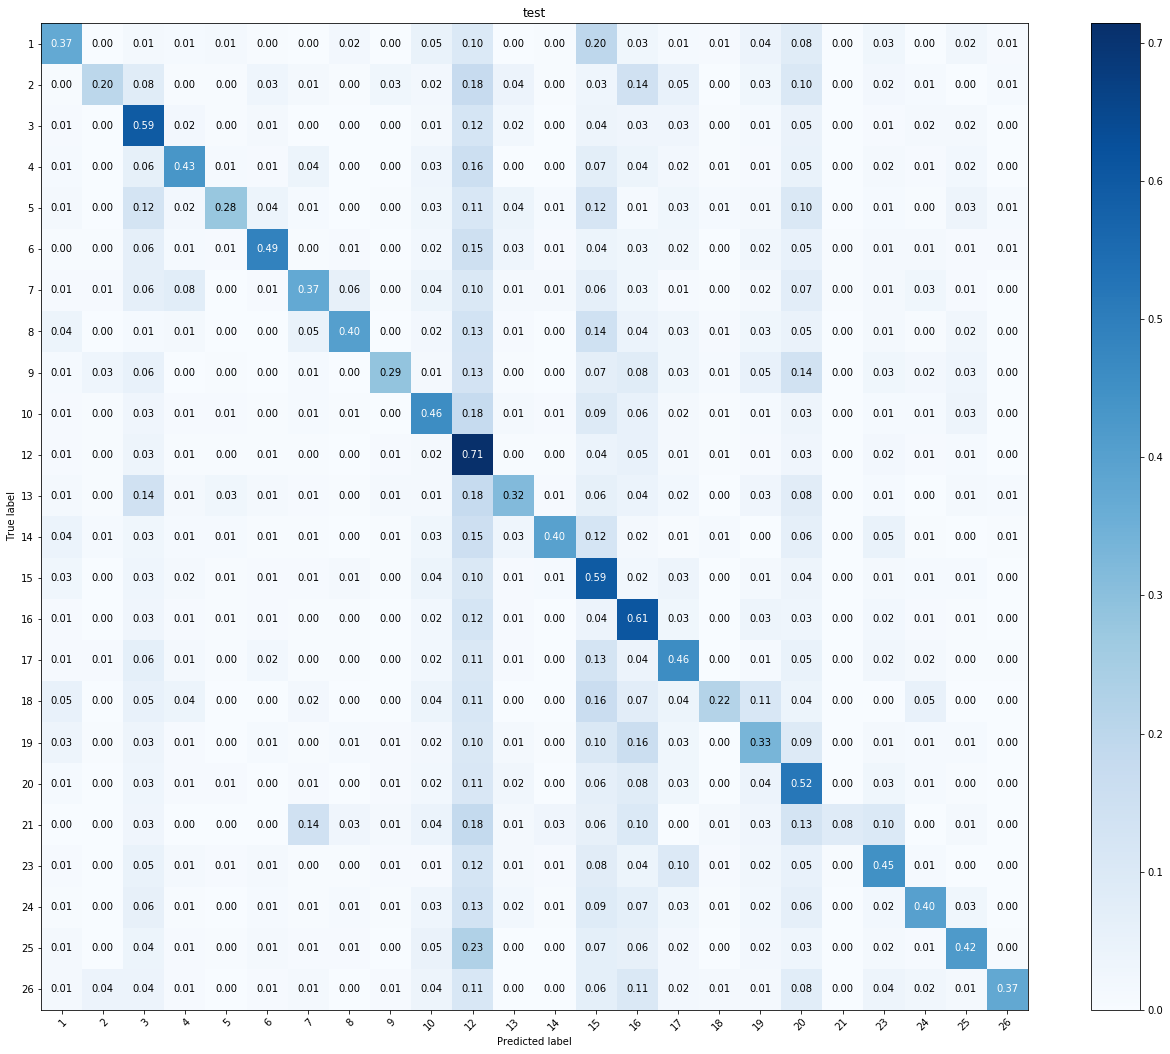

In [12]:
with open('../../stats/1574862238_preds_classifiers.pkl', 'rb') as f:
    loaded_preds_classifiers = pickle.load(f)
pt.plot_cf(loaded_preds_classifiers['validation_y'], loaded_preds_classifiers['preds'][1], title = 'test')

## Confusion matrix for SMOTE best model

(26, 26)


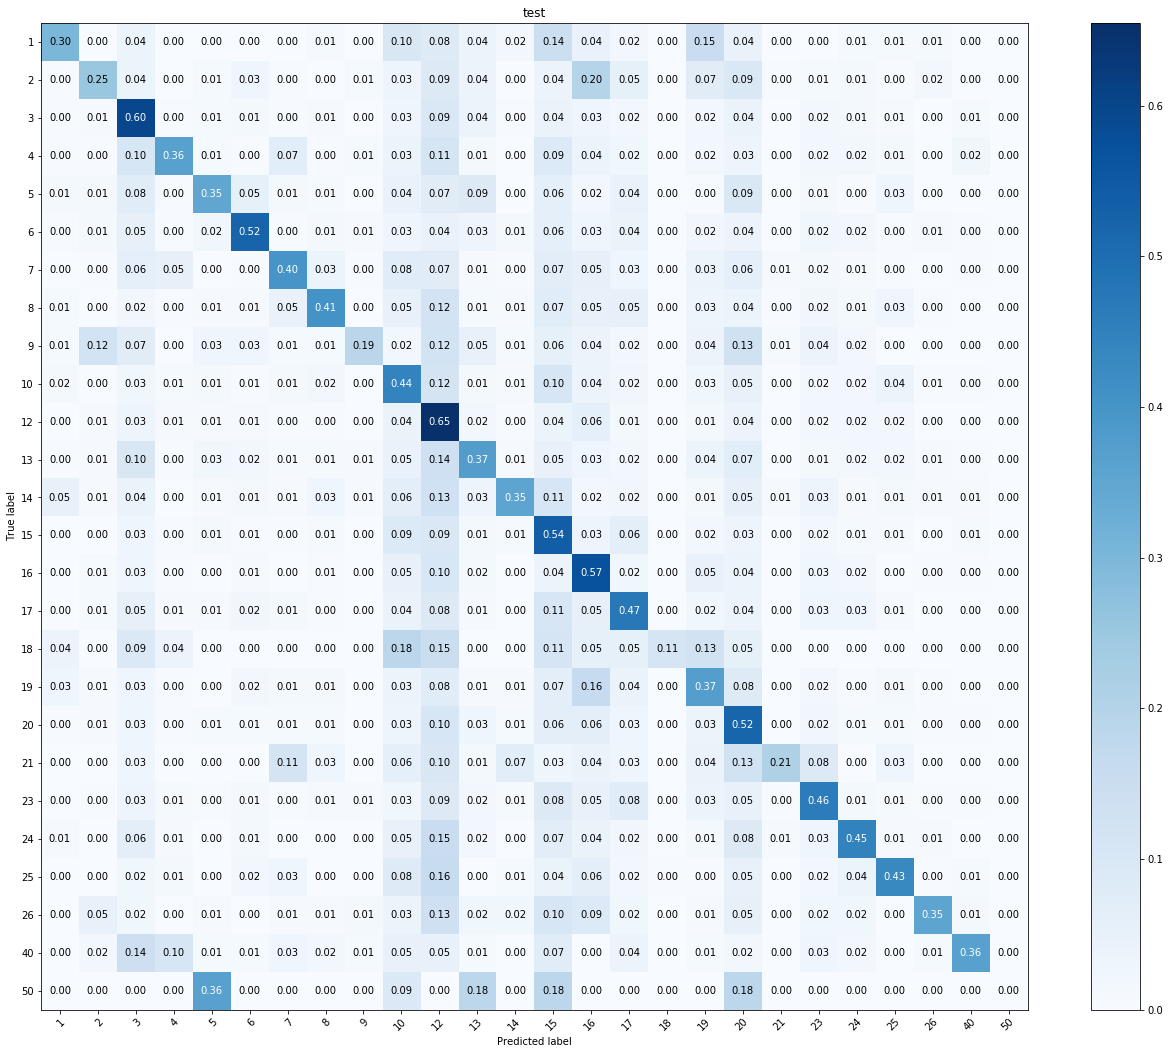

In [26]:
with open('../../stats/1571522842_preds_samplers_MultiNB_best_TfidfVectorizer_best.pkl', 'rb') as f:
    loaded_preds_validation = pickle.load(f)
pt.plot_cf(loaded_preds_validation['validation_y'], loaded_preds_validation['preds'][21], title = 'test')

## Samplers and classifiers with best params

In [27]:
loaded_results = pd.read_pickle('../../stats/1571530075_results_samplers_classifiers_best_TfidfVectorizer_best.pkl')
display(loaded_results.sort_values(by=['Accuracy'], ascending=False).groupby('Sampler').head(1))
display(loaded_results.sort_values(by=['Precision'], ascending=False).groupby('Sampler').head(1))
display(loaded_results.sort_values(by=['Fscore'], ascending=False).groupby('Sampler').head(1))

,Features,Vectorizer,V.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
58_All/TfidfVectorizer/ComplementNB/TomekLinks,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",TomekLinks,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.483382,0.440829,0.385097,0.400032
21_All/TfidfVectorizer/MultinomialNB/SMOTE,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",MultinomialNB,{'alpha': 0.001},SMOTE,"{'k_neighbors': 7, 'n_jobs': -1, 'random_state...",0.482143,0.483075,0.386732,0.412962
50_All/TfidfVectorizer/LinearSVC/RandomOverSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",RandomOverSampler,"{'random_state': 1, 'sampling_strategy': 'mino...",0.481111,0.525428,0.375161,0.401125
38_All/TfidfVectorizer/LinearSVC/ADASYN,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",ADASYN,"{'n_jobs': -1, 'n_neighbors': 7, 'random_state...",0.481111,0.525845,0.375404,0.401561
54_All/TfidfVectorizer/ComplementNB/RandomUnderSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",RandomUnderSampler,"{'random_state': 1, 'replacement': True, 'samp...",0.413398,0.397592,0.380256,0.369128
52_All/TfidfVectorizer/ComplementNB/ClusterCentroids,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",ClusterCentroids,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.413192,0.406768,0.380134,0.368810


,Features,Vectorizer,V.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
33_All/TfidfVectorizer/LinearSVC/TomekLinks,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",TomekLinks,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.478633,0.529720,0.359922,0.391632
38_All/TfidfVectorizer/LinearSVC/ADASYN,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",ADASYN,"{'n_jobs': -1, 'n_neighbors': 7, 'random_state...",0.481111,0.525845,0.375404,0.401561
44_All/TfidfVectorizer/LinearSVC/SMOTE,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",SMOTE,"{'k_neighbors': 5, 'n_jobs': -1, 'random_state...",0.481214,0.525748,0.375454,0.401570
50_All/TfidfVectorizer/LinearSVC/RandomOverSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",RandomOverSampler,"{'random_state': 1, 'sampling_strategy': 'mino...",0.481111,0.525428,0.375161,0.401125
82_All/TfidfVectorizer/SGDClassifier/RandomUnderSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",SGDClassifier,"{'alpha': 0.01, 'loss': 'hinge', 'n_jobs': -1}",RandomUnderSampler,"{'random_state': 1, 'replacement': False, 'sam...",0.344550,0.495381,0.290852,0.305505
0_All/TfidfVectorizer/MultinomialNB/ClusterCentroids,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",MultinomialNB,{'alpha': 0.001},ClusterCentroids,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.409476,0.460527,0.361457,0.365328


,Features,Vectorizer,V.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
49_All/TfidfVectorizer/LinearSVC/SMOTE,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",SMOTE,"{'k_neighbors': 13, 'n_jobs': -1, 'random_stat...",0.473472,0.407205,0.447142,0.418765
41_All/TfidfVectorizer/LinearSVC/ADASYN,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",ADASYN,"{'n_jobs': -1, 'n_neighbors': 13, 'random_stat...",0.469034,0.405278,0.448348,0.417885
51_All/TfidfVectorizer/LinearSVC/RandomOverSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",RandomOverSampler,"{'random_state': 1, 'sampling_strategy': 'auto'}",0.470273,0.402532,0.447953,0.415215
58_All/TfidfVectorizer/ComplementNB/TomekLinks,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",TomekLinks,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.483382,0.440829,0.385097,0.400032
54_All/TfidfVectorizer/ComplementNB/RandomUnderSampler,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",RandomUnderSampler,"{'random_state': 1, 'replacement': True, 'samp...",0.413398,0.397592,0.380256,0.369128
52_All/TfidfVectorizer/ComplementNB/ClusterCentroids,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",ComplementNB,"{'alpha': 0.01, 'norm': False}",ClusterCentroids,"{'n_jobs': -1, 'random_state': 1, 'sampling_st...",0.413192,0.406768,0.380134,0.368810


(26, 26)


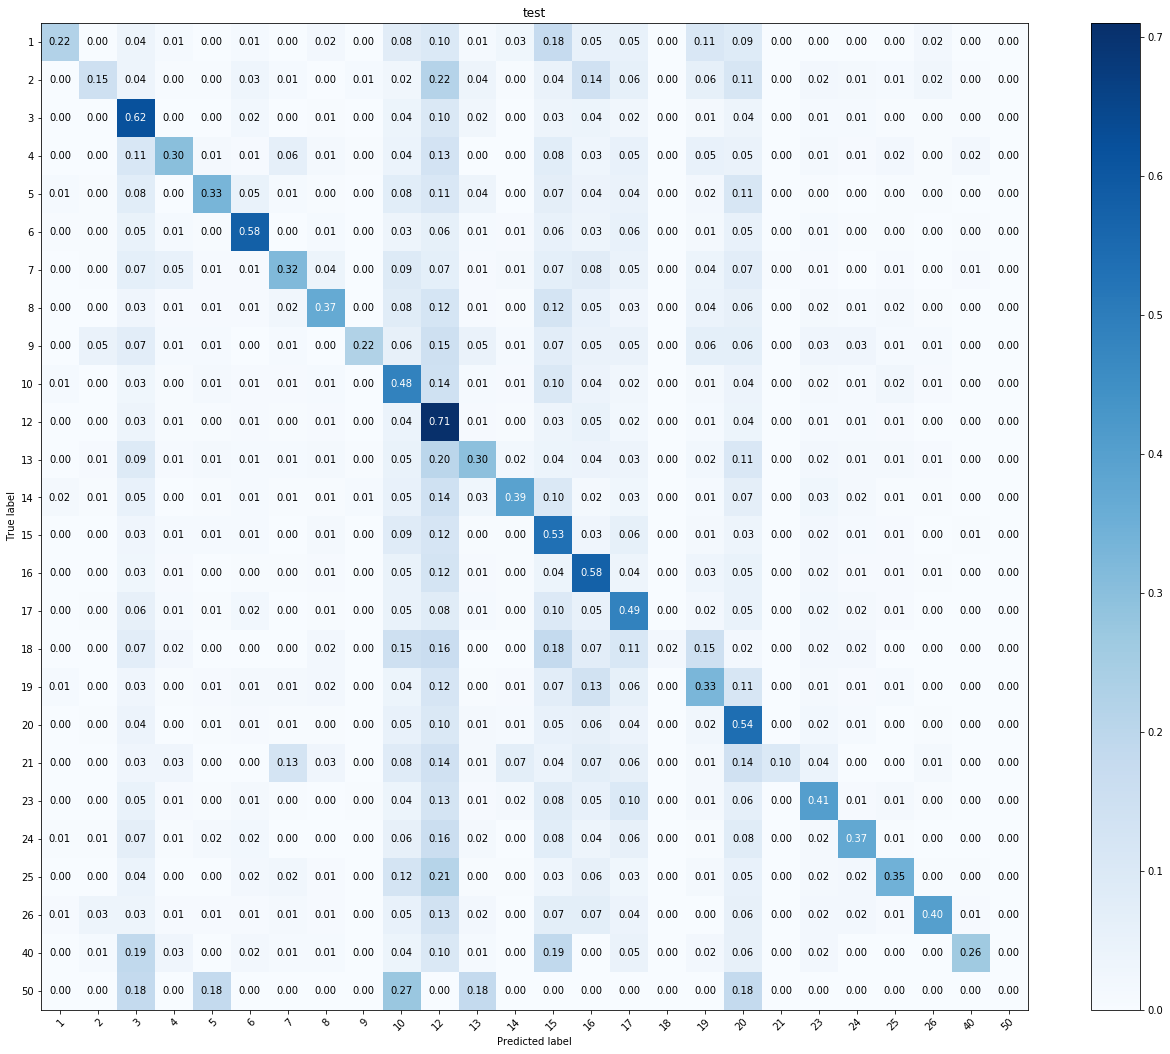

In [28]:
with open('../../stats/1571530075_preds_samplers_classifiers_best_TfidfVectorizer_best.pkl', 'rb') as f:
    loaded_preds_validation = pickle.load(f)
pt.plot_cf(loaded_preds_validation['validation_y'], loaded_preds_validation['preds'][33], title = 'test')

## POS tags and ontology tags counts

In [29]:
loaded_results = pd.read_pickle('../../stats/1571607882_results_POSandONT_MultinomialNB_best_TfidfVectorizer_best.pkl')
display(loaded_results.sort_values(by=['Accuracy']))

,Features,Vectorizer,V.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
0_All/TfidfVectorizer/MultinomialNB/No_sampling,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",MultinomialNB,{'alpha': 0.001},No_sampling,{},0.480491,0.485051,0.370663,0.399149


(26, 26)


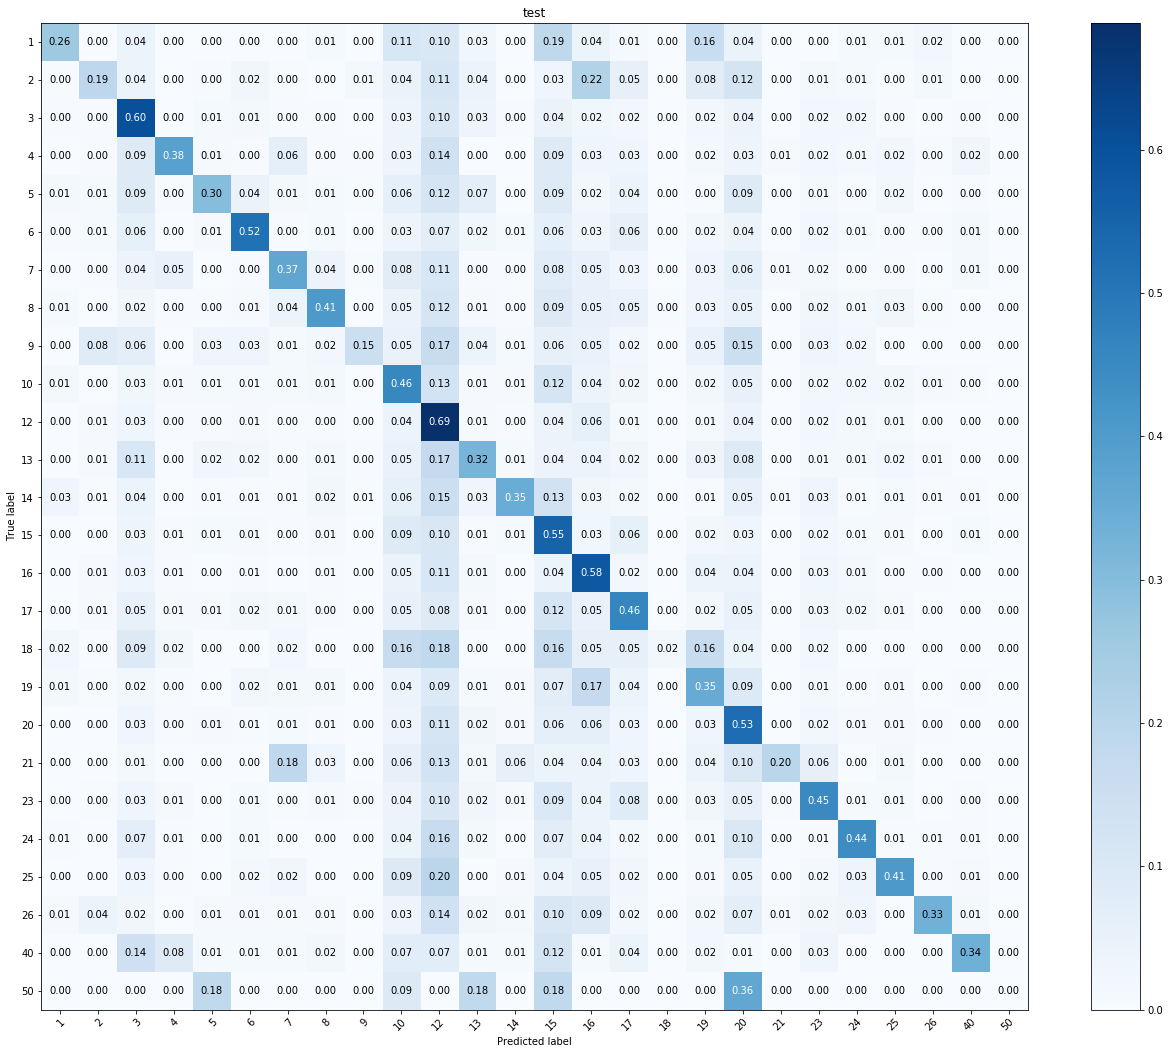

In [30]:
with open('../../stats/1571607882_preds_POSandONT_MultinomialNB_best_TfidfVectorizer_best.pkl', 'rb') as f:
    loaded_preds_validation = pickle.load(f)
pt.plot_cf(loaded_preds_validation['validation_y'], loaded_preds_validation['preds'][0], title = 'test')

In [31]:
loaded_results = pd.read_pickle('../../stats/1571608257_results_POSandONT_LinearSVC_best_TfidfVectorizer_best.pkl')
display(loaded_results.sort_values(by=['Accuracy']))

,Features,Vectorizer,V.params,Classifier,C.params,Sampler,S.params,Accuracy,Precision,Recall,Fscore
0_All/TfidfVectorizer/LinearSVC/No_sampling,All,TfidfVectorizer,"{'max_df': 0.3, 'max_features': None, 'norm': ...",LinearSVC,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",No_sampling,{},0.482865,0.522558,0.367848,0.399026


(26, 26)


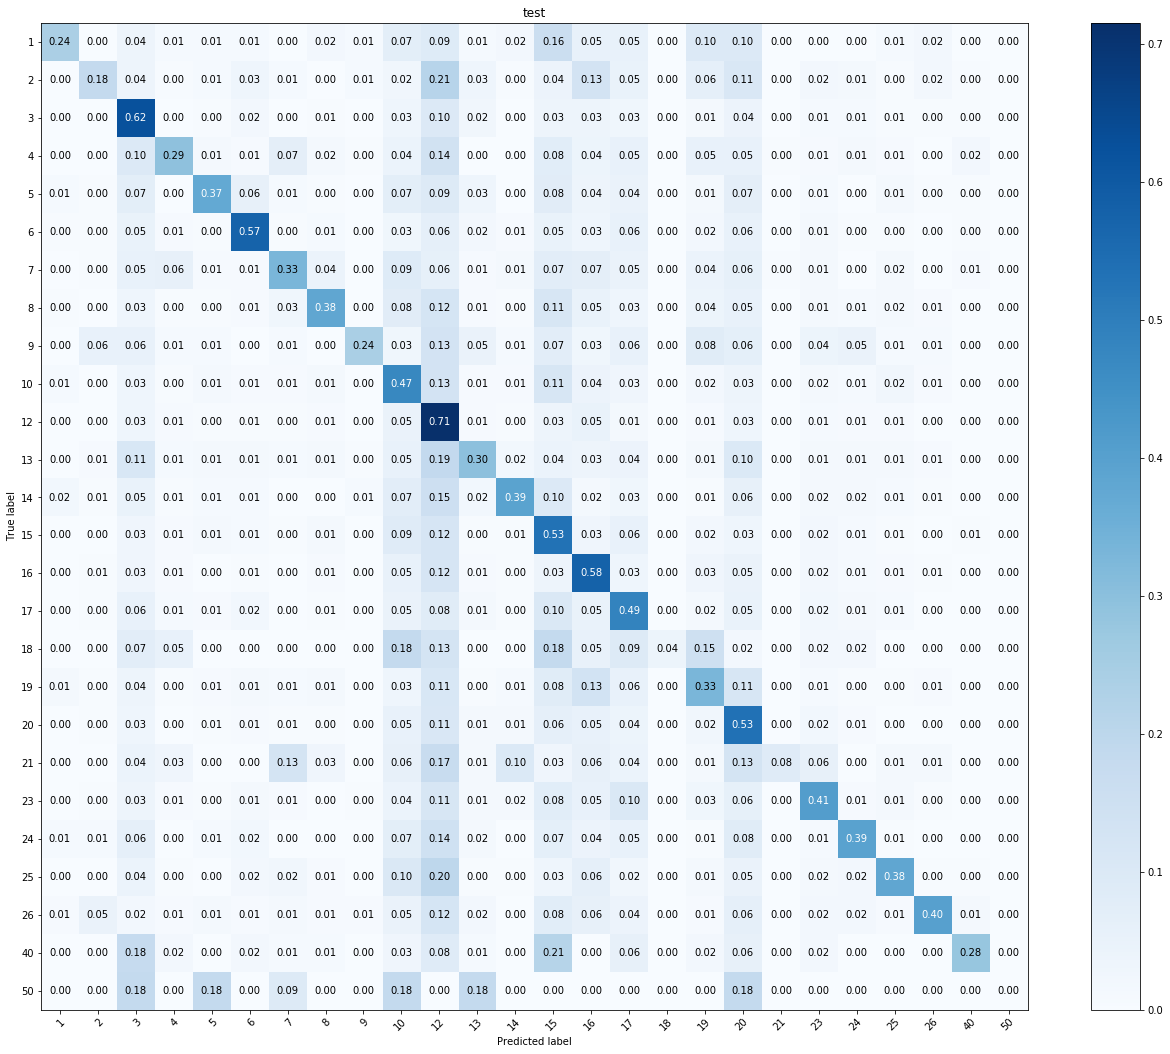

In [32]:
with open('../../stats/1571608257_preds_POSandONT_LinearSVC_best_TfidfVectorizer_best.pkl', 'rb') as f:
    loaded_preds_validation = pickle.load(f)
pt.plot_cf(loaded_preds_validation['validation_y'], loaded_preds_validation['preds'][0], title = 'test')